# How to use bioimage.io models with bioimageio.core

This notebook shows how `bioimageio.core` can be used to load and deploy AI models shared in the [bioimage.io Model Zoo](https://bioimage.io).

See the `bioimageio.spec` example notebook [load_model_and_create_your_own.ipynb](https://github.com/bioimage-io/spec-bioimage-io/blob/main/example/load_model_and_create_your_own.ipynb) for more details on loading and inspecting a model descriptions as well as how to create such descriptions in Python.

quick links:
- [Create an input sample for a given model](#create_sample_for_model)

## 0. Setup

### 0.1. Install dependencies

In [1]:
# type: ignore
dry_run: bool = True

def install_missing(name: str, version: str):
    if dry_run:
        print(f"Missing dependency {name}; would install {name}=={version}")
    else:
        %pip install {name}=={version}


try:
    import bioimageio.core
except ImportError:
    install_missing("bioimageio.core", "0.8.0")

try:
    import torch
except ImportError:
    install_missing("torch", "2.5.1")

try:
    import matplotlib
except ImportError:
    install_missing("matplotlib", "3.9.0")

### 0.2 Prettify validation errors

The `enable_pretty_validation_errors_in_ipynb` function registers an IPython exception handler to prettify raised validation errors.

In [2]:
from bioimageio.spec.pretty_validation_errors import (
    enable_pretty_validation_errors_in_ipynb,
)

enable_pretty_validation_errors_in_ipynb()

### 0.3. Utility functions

Helper functions that are used in this notebook.

In [3]:
from bioimageio.core import Tensor
from bioimageio.spec.utils import download
from typing import Mapping


try:
    import napari
except ImportError:

    def show_images(images: Mapping[str, Tensor]):
        for name, im in images.items():
            im = im.data
            print(f"{name}: {im.shape}")
            # TODO: add plt.imshow

else:
    def show_images(images: Mapping[str, Tensor]):
        v = napari.Viewer()
        for name, tensor in images.items():
            im = tensor.data.data
            print(f"napari viewer: adding {name}")
            _ = v.add_image(im, name=name)


## 1. Load a model

### 1.1 Inspect available models in the Bioimage Model Zoo

Go to https://bioimage.io to browser available models

### 1.2 Load model from the BioImage Model Zoo

`bioimage.io` resources may be identified via their bioimage.io __ID__, e.g. "affable-shark" or the [__DOI__](https://doi.org/) of their [__Zenodo__](https://zenodo.org/) backup.

Both of these options may be version specific ("affable-shark/1" or a version specific [__Zenodo__](https://zenodo.org/) backup [__DOI__](https://doi.org/)).

Alternatively, any bioimageio.yaml source --- a single YAML file or a .zip package, may be loaded by providing its __local path__ or __URL__.

In [4]:
MODEL_SOURCE = "affable-shark"  # bioimageio ID
# MODEL_SOURCE = "10.5281/zenodo.6287342"  # DOI of the backup hosted on Zenodo
# MODEL_SOURCE = "https://uk1s3.embassy.ebi.ac.uk/public-datasets/bioimage.io/affable-shark/1.1/files/rdf.yaml"  # URL to bioimageio.yaml file
# MODEL_SOURCE = "bioimageio_package.zip"  # path to a local zip file

`load_description` is a function of the `bioimageio.spec` package, but as it is a sub-package of `bioimageio.core` it can also be called from it by `bioimageio.core.load_description`.

To learn more about the functionalities of the `bioimageio.spec` package, see the [bioimageio.spec package example notebook](https://github.com/bioimage-io/spec-bioimage-io/blob/main/example/load_model_and_create_your_own.ipynb), also available as a [Google Colab](https://colab.research.google.com/github/bioimage-io/spec-bioimage-io/blob/main/example/load_model_and_create_your_own.ipynb) notebook.

In [5]:
from bioimageio.core import load_model_description
from bioimageio.spec import InvalidDescr, ModelDescr

model = load_model_description(MODEL_SOURCE)
if isinstance(model, InvalidDescr):
    model.validation_summary.display()
    raise TypeError("Invalid model description")
elif not isinstance(model, ModelDescr):
    model.validation_summary.display()
    raise TypeError(f"This notebook requires the latest model format version {ModelDescr.implemented_format_version}.")


  0%|                                              | 0.00/1.57k [00:00<?, ?B/s]
  0%|                                              | 0.00/1.57k [00:00<?, ?B/s]

  0%|                                              | 0.00/1.57k [00:00<?, ?B/s]
  0%|                                              | 0.00/1.57k [00:00<?, ?B/s]



### 1.3 (optional) Inspect the model metadata

Here is the complete metadata of the loaded model.
The model fields are documented [as part of our json schema documentation](https://bioimage-io.github.io/spec-bioimage-io/bioimageio/spec.html#ModelDescr) and in the [bioimageio.spec developer documentation](https://bioimage-io.github.io/spec-bioimage-io/bioimageio/spec.html#ModelDescr).

In [6]:
from rich import print

print(model)

ModelDescr(
    name='NucleiSegmentationBoundaryModel',
    description='Nucleus segmentation for fluorescence microscopy',
    covers=[RelativeFilePath(root=PureWindowsPath('cover.png'))],
    id_emoji='🦈',
    authors=[
        Author(
            affiliation='EMBL Heidelberg',
            email=None,
            orcid=None,
            name='Constantin Pape',
            github_user='constantinpape'
        )
    ],
    attachments=[
        FileDescr(
            source=RelativeFilePath(root=PureWindowsPath('zero_mean_unit_variance.ijm')),
            sha256='767f2c3a50e36365c30b9e46e57fcf82e606d337e8a48d4a2440dc512813d186'
        )
    ],
    cite=[
        CiteEntry(text='training library', doi='10.5281/zenodo.5108853', url=None),
        CiteEntry(text='architecture', doi='10.1007/978-3-319-24574-4_28', url=None),
        CiteEntry(text='segmentation algorithm', doi='10.1038/nmeth.4151', url=None),
        CiteEntry(text='data', doi=None, url='https://www.nature.com/articles/s41592-019-0612-7')
    ],
    license='CC-BY-4.0',
    git_repo=None,
    icon=None,
    links=[
        'ilastik/stardist_dsb_training_data',
        'ilastik/ilastik',
        'deepimagej/deepimagej',
        'imjoy/BioImageIO-Packager'
    ],
    uploader=Uploader(email='thefynnbe@gmail.com', name='Fynn Beuttenmüller'),
    maintainers=[
        Maintainer(
            affiliation=None,
            email=None,
            orcid=None,
            name='Constantin Pape',
            github_user='constantinpape'
        )
    ],
    tags=['fluorescence-light-microscopy', 'nuclei', 'instance-segmentation', 'unet', '2d'],
    version=Version(root=1.1),
    format_version='0.5.4',
    type='model',
    id='10.5281/zenodo.5764892/6647674',
    documentation=RelativeFilePath(root=PureWindowsPath('documentation.md')),
    inputs=[
        InputTensorDescr(
            id='input0',
            description='',
            axes=[
                BatchAxis(id='batch', description='', type='batch', size=None),
                ChannelAxis(id='channel', description='', type='channel', channel_names=['channel0']),
                SpaceInputAxis(
                    size=ParameterizedSize(min=64, step=16),
                    id='y',
                    description='',
                    type='space',
                    unit=None,
                    scale=1.0,
                    concatenable=False
                ),
                SpaceInputAxis(
                    size=ParameterizedSize(min=64, step=16),
                    id='x',
                    description='',
                    type='space',
                    unit=None,
                    scale=1.0,
                    concatenable=False
                )
            ],
            test_tensor=FileDescr(
                source=RelativeFilePath(root=PureWindowsPath('test_input_0.npy')),
                sha256='c29bd6e16e3f7856217b407ba948222b1c2a0da41922a0f79297e25588614fe2'
            ),
            sample_tensor=FileDescr(
                source=RelativeFilePath(root=PureWindowsPath('sample_input_0.tif')),
                sha256='a24b3c708b6ca6825494eb7c5a4d221335fb3eef5eb9d03f4108907cdaad2bf9'
            ),
            data=IntervalOrRatioDataDescr(
                type='float32',
                range=(None, None),
                unit='arbitrary unit',
                scale=1.0,
                offset=None
            ),
            optional=False,
            preprocessing=[
                EnsureDtypeDescr(id='ensure_dtype', kwargs=EnsureDtypeKwargs(dtype='float32')),
                ZeroMeanUnitVarianceDescr(
                    id='zero_mean_unit_variance',
                    kwargs=ZeroMeanUnitVarianceKwargs(axes=['channel', 'y', 'x'], eps=1e-06)
                ),
                EnsureDtypeDescr(id='ensure_dtype', kwargs=EnsureDtypeKwargs(dtype='float32'))
            ]
        )
    ],
    outputs=[
        OutputTensorDescr(
            id='output0',
            description='',

We can use this metadata programmatically to explore and deploy (next section) the model. 
For example we can checkout the model's cover images.
For a step-by-step inspection of other metadata fields, please refer to the [bioimageio.spec example notebook](https://github.com/bioimage-io/spec-bioimage-io/blob/main/example/load_model_and_create_your_own.ipynb).

  0%|                                              | 0.00/89.1k [00:00<?, ?B/s]
  0%|                                              | 0.00/89.1k [00:00<?, ?B/s]



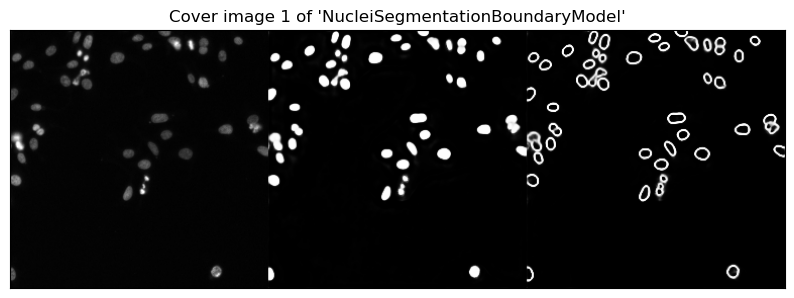

In [7]:
from bioimageio.core.io import load_image
import matplotlib.pyplot as plt

for i, cover in enumerate(model.covers):
    cover_data = load_image(cover)
    _ = plt.figure(figsize=(10, 10))
    _ = plt.imshow(cover_data)
    _ = plt.xticks([])
    _ = plt.yticks([])
    _ = plt.title(f"Cover image {i+1} of '{model.name}'")
    _ = plt.show()

## 2. Test the model

The `bioimageio.core.test_model` function can be used to fully test the model.
This is done by running the predicition on the test input(s) and checking that they agree with the test output(s) provided in the model documentation.

This test should be run before using the model to ensure that it works properly.

----

`bioimageio.core.test_model` returns a validation dictionary with `status='passed'/'failed'` and other detailed information that can be inspected by calling `.display()` on it.
The validation sumary may also be saved (`.save()`) as JSON, Markdown or HTML file.
Validation summaries may be loaded from json (`.load_json()`).

The validation summary will indicate:
- the versions of the `bioimageio.spec` and `bioimageio.core` libraries used to run the validation
- the status of several validation steps
    - ✔️: Success
    - ⚠: Warning
    - ❌: Error

In [8]:
from bioimageio.core import test_model

test_summary = test_model(model)

2025-04-02 16:57:44.264 | DEBUG    | bioimageio.core._resource_tests:_test_model_inference:593 - starting 'Reproduce test outputs from test inputs (onnx)'
  0%|                                               | 0.00/116M [00:00<?, ?B/s]
  0%|                                               | 0.00/116M [00:00<?, ?B/s]

C:\repos\bioimage-io\core-bioimage-io-python\bioimageio\core\backends\onnx_backend.py:51: UserWarning: Device management is not implemented for onnx yet, cannot unload model
  warnings.warn(
2025-04-02 16:58:00.933 | INFO     | bioimageio.core._resource_tests:_test_model_inference_parametrized:705 - Testing inference with 6 different inputs (B, N): {(1, 2), (2, 1), (1, 1), (2, 0), (2, 2), (1, 0)}
  0%|                                               | 0.00/116M [00:00<?, ?B/s]
  0%|                                               | 0.00/116M [00:00<?, ?B/s]



C:\repos\bioimage-io\core-bioimage-io-python\bioimageio\core\backends\onnx_backend.py:51: UserWarning: Device management is not implemented for onnx yet, cannot unload model
  warnings.warn(


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ C:\repos\bioimage-io\core-bioimage-io-python\bioimageio\core\_resource_tests.py:768 in _test_mod │
│                                                                                                  │
│   765 │   │   ) as prediction_pipeline:                                                          │
│   766 │   │   │   for n, batch_size, inputs, exptected_output_shape in generate_test_cases():    │
│   767 │   │   │   │   error: Optional[str] = None                                                │
│ ❱ 768 │   │   │   │   result = prediction_pipeline.predict_sample_without_blocking(inputs)       │
│   769 │   │   │   │   if len(result.members) != len(exptected_output_shape):                     │
│   770 │   │   │   │   │   error = (                                                              │
│   771 │   │   │   │   │   │   f"Expected {len(exptected_output_shape)} outputs,"                 │
│                                                                                                  │
│ C:\repos\bioimage-io\core-bioimage-io-python\bioimageio\core\_prediction_pipeline.py:160 in pred │
│                                                                                                  │
│   157 │   │   if not skip_preprocessing:                                                         │
│   158 │   │   │   self.apply_preprocessing(sample)                                               │
│   159 │   │                                                                                      │
│ ❱ 160 │   │   output = self._adapter.forward(sample)                                             │
│   161 │   │   if not skip_postprocessing:                                                        │
│   162 │   │   │   self.apply_postprocessing(output)                                              │
│   163                                                                                            │
│                                                                                                  │
│ C:\repos\bioimage-io\core-bioimage-io-python\bioimageio\core\backends\_model_adapter.py:205 in f │
│                                                                                                  │
│   202 │   │   │   )                                                                              │
│   203 │   │   │   for in_id, in_order in zip(self._input_ids, self._input_axes)                  │
│   204 │   │   ]                                                                                  │
│ ❱ 205 │   │   output_arrays = self._forward_impl(input_arrays)                                   │
│   206 │   │   assert len(output_arrays) <= len(self._output_ids)                                 │
│   207 │   │   output_tensors = [                                                                 │
│   208 │   │   │   None if a is None else Tensor(a, dims=d)                                       │
│                                                                                                  │
│ C:\repos\bioimage-io\core-bioimage-io-python\bioimageio\core\backends\onnx_backend.py:40 in _for │
│                                                                                                  │
│   37 │   def _forward_impl(                                                                      │
│   38 │   │   self, input_arrays: Sequence[Optional[NDArray[Any]]]                                │
│   39 │   ) -> List[Optional[NDArray[Any]]]:                                                      │
│ ❱ 40 │   │   result: Any = self._session.run(                                                    │
│   41 │   │   │   None, dict(zip(self._input_names, input_arrays))                                │
│   42 │   │   )                                                                                   │
│   43 │   │   if is_list(result) or is_tuple(result):       

2025-04-02 16:58:06.465 | DEBUG    | bioimageio.core._resource_tests:_test_model_inference:593 - starting 'Reproduce test outputs from test inputs (pytorch_state_dict)'
2025-04-02 16:58:09.841 | INFO     | bioimageio.core._resource_tests:_test_model_inference_parametrized:705 - Testing inference with 6 different inputs (B, N): {(1, 2), (2, 1), (1, 1), (2, 0), (2, 2), (1, 0)}
2025-04-02 16:58:13.088 | DEBUG    | bioimageio.core._resource_tests:_test_model_inference:593 - starting 'Reproduce test outputs from test inputs (torchscript)'
  0%|                                               | 0.00/116M [00:00<?, ?B/s]
  0%|                                               | 0.00/116M [00:00<?, ?B/s]

2025-04-02 16:58:21.352 | INFO     | bioimageio.core._resource_tests:_test_model_inference_parametrized:705 - Testing inference with 6 different inputs (B, N): {(1, 2), (2, 1), (1, 1), (2, 0), (2, 2), (1, 0)}
  0%|                                               | 0.00/116M [00:00<?, ?B/s]
  0%|     

In [9]:
test_summary.display()

❌ 
 bioimageio format validation 
 
 
 status 
 failed 
 
 
 source 
 https://hypha.aicell.io/bioimage-io/artifacts/affable-shark/files/rdf.yaml 
 
 
 id 
 10.5281/zenodo.5764892/6647674 
 
 
 format version 
 model 0.5.4 
 
 
 bioimageio.core 
 0.8.0 
 
 
 bioimageio.spec 
 0.5.4.2 
 
 
 
 
 
 Location 
 Details 
 
 
 ✔️ 
 
 Successfully created `ModelDescr` instance. 
 
 
 ✔️ 
 
 bioimageio.spec format validation model 0.5.4 
 
 
 ✔️ 
 type 
 Has expected resource type 
 
 
 ✔️ 
 weights.onnx 
 Reproduce test outputs from test inputs (onnx) 
 
 
 
 weights.onnx 
 recommended conda environment (Reproduce test outputs from test inputs (onnx)) 
 
 
 
 
 %YAML 1.2
---
channels:
 - conda-forge
 - nodefaults
dependencies:
 - conda-forge::bioimageio.core
 - onnxruntime
 - pip
 
 
 
 
 weights.onnx 
 conda compare (Reproduce test outputs from test inputs (onnx)) 
 
 
 
 
 bioimageio.core not found 
 
 
 ❌ 
 weights.onnx 
 Run onnx inference for parametrized inputs 
 
 
 ❌ 
 weights.onnx 
 [ONNXRuntimeError] : 2 : INVALID_ARGUMENT : Got invalid dimensions for input: input.1 for the following indices
 index: 2 Got: 64 Expected: 256
 index: 3 Got: 64 Expected: 256
 Please fix either the inputs/outputs or the model. 
 
 
 
 
 See Traceback 1 . 
 
 
 ✔️ 
 weights.pytorch_state_dict 
 Reproduce test outputs from test inputs (pytorch_state_dict) 
 
 
 
 weights.pytorch_state_dict 
 recommended conda environment (Reproduce test outputs from test inputs (pytorch_state_dict)) 
 
 
 
 
 %YAML 1.2
---
channels:
 - pytorch
 - conda-forge
 - nodefaults
dependencies:
 - conda-forge::bioimageio.core
 - mkl ==2024.0.0
 - numpy <2
 - pip
 - pytorch==1.10.0
 - setuptools <70.0.0
 - torchaudio==0.10.0
 - torchvision==0.11.0
 
 
 
 
 weights.pytorch_state_dict 
 conda compare (Reproduce test outputs from test inputs (pytorch_state_dict)) 
 
 
 
 
 bioimageio.core not found mkl found but mismatch. Specification pkg: mkl==2024.0.0, Running pkg:
mkl==2024.2.2=h66d3029_15 pytorch found but mismatch. Specification pkg: pytorch==1.10.0,
Running pkg: pytorch==2.6.0=cpu_mkl_py311_hde8219b_101 setuptools found but mismatch.
Specification pkg: setuptools[version='<70.0.0'], Running pkg: setuptools==75.3.0=pyhd8ed1ab_0
torchaudio not found torchvision found but mismatch. Specification pkg: torchvision==0.11.0,
Running pkg: torchvision==0.21.0=cpu_py311_hc601fa1_0 
 
 
 ✔️ 
 weights.pytorch_state_dict 
 Run pytorch_state_dict inference for inputs with batch_size: 1 and size parameter n: 0 
 
 
 ✔️ 
 weights.pytorch_state_dict 
 Run pytorch_state_dict inference for inputs with batch_size: 1 and size parameter n: 1 
 
 
 ✔️ 
 weights.pytorch_state_dict 
 Run pytorch_state_dict inference for inputs with batch_size: 1 and size parameter n: 2 
 
 
 ✔️ 
 weights.pytorch_state_dict 
 Run pytorch_state_dict inference for inputs with batch_size: 2 and size parameter n: 0 
 
 
 ✔️ 
 weights.pytorch_state_dict 
 Run pytorch_state_dict inference for inputs with batch_size: 2 and size parameter n: 1 
 
 
 ✔️ 
 weights.pytorch_state_dict 
 Run pytorch_state_dict inference for inputs with batch_size: 2 and size parameter n: 2 
 
 
 ✔️ 
 weights.torchscript 
 Reproduce test outputs from test inputs (torchscript) 
 
 
 
 weights.torchscript 
 recommended conda environment (Reproduce test outputs from test inputs (torchscript)) 
 
 
 
 
 %YAML 1.2
---
channels:
 - pytorch
 - conda-forge
 - nodefaults
dependencies:
 - conda-forge::bioimageio.core
 - mkl ==2024.0.0
 - numpy <2
 - pip
 - pytorch==1.10.0
 - setuptools <70.0.0
 - torchaudio==0.10.0
 - torchvision==0.11.0
 
 
 
 
 weights.torchscript 
 conda compare (Reproduce test outputs from test inputs (torchscript)) 
 
 
 
 
 bioimageio.core not found mkl found but mismatch. Specification pkg: mkl==2024.0.0, Running pkg:
mkl==2024.2.2=h66d3029_15 pytorch found but mismatch. Specification pkg: pytorch==1.10.0,
Running pkg: pytorch==2.6.0=cpu_mkl_py311_hde8219b_101 setuptools found but mismatch.
Specification pkg: setuptools[version='<

In [10]:
_ = test_summary.save("summary")

2025-04-02 20:48:09.875 | INFO     | bioimageio.spec.summary:save_json:443 - Saved summary to C:\repos\bioimage-io\core-bioimage-io-python\example\summary\summary.json
2025-04-02 20:48:09.898 | INFO     | bioimageio.spec.summary:save_markdown:450 - Saved Markdown formatted summary to C:\repos\bioimage-io\core-bioimage-io-python\example\summary\summary.md
2025-04-02 20:48:09.962 | INFO     | bioimageio.spec.summary:save_html:458 - Saved HTML formatted summary to C:\repos\bioimage-io\core-bioimage-io-python\example\summary\summary.html


## 3. Running a prediction

`bioimageio.core` implements the functionality to run a prediction with models described in the `bioimage.io` format.

This includes functions to run predictions on `numpy.ndarray`/`xarray.DataArray` as input and convenience functions to run predictions for images stored on disc.

### 3.1. Create an input sample

In [11]:
from bioimageio.spec.model import v0_5
from bioimageio.spec.utils import load_array

assert isinstance(model, v0_5.ModelDescr)
input_image = load_array(model.inputs[0].test_tensor)
print(f"array shape: {input_image.shape}")

array shape: (1, 1, 256, 256)

Create a `Tensor` (light wrapper around an `xarray.DataArray`) from the test input image. 

`bioimageio.core.Tensors/xarray.DataArrays` are like numpy arrays, but they have annotated axes.

The axes are used to validate that the axes of the input image match the axes expected by the model.

In [12]:
from bioimageio.core import Tensor

test_input_tensor = Tensor.from_numpy(input_image, dims=model.inputs[0].axes)

# print the axis annotations ('dims') and the shape of the input array
print(f"tensor shape: {test_input_tensor.tagged_shape}")

tensor shape: Frozen({'batch': 1, 'channel': 1, 'y': 256, 'x': 256})

A collection of tensors is called a `Sample`.

In the case of the `affable-shark` model it only has one input, but for models with multiple inputs a `Sample` includes a tensor for each input.

In [13]:
from bioimageio.core import Sample

sample = Sample(members={"raw": test_input_tensor}, stat=None, id="sample-from-numpy")

sample

Sample(members={'raw': <bioimageio.core.tensor.Tensor object at 0x000001C0374454D0>}, stat=None, id='sample-from-numpy')

#### 3.1.1 Create an input sample with create_sample_for_model

`bioimageio.core` provides the helper function `create_sample_for_model` to automatically create the `Sample` for the given model.<a name="create_sample_for_model"></a>

In [14]:
from bioimageio.core.digest_spec import create_sample_for_model
from bioimageio.spec.utils import download

input_paths = {ipt.id: download(ipt.test_tensor).path for ipt in model.inputs}
print(f"input paths: {input_paths}")
assert isinstance(model, v0_5.ModelDescr)
sample = create_sample_for_model(
    model=model, inputs=input_paths, sample_id="my_demo_sample"
)

sample

input paths: {'input0': 
WindowsPath('C:/Users/fbeut/AppData/Local/bioimageio/bioimageio/Cache/277e1abf8d7287b159459f2288fbcfa1-test_input_0
.npy')}

Sample(members={'input0': <bioimageio.core.tensor.Tensor object at 0x000001C031779890>}, stat={}, id='my_demo_sample')

#### 3.1.2 Get the test input sample
There is also a helper function `get_test_inputs` to directly import the test input sample for a given model.

In [15]:
from bioimageio.core.digest_spec import get_test_inputs

test_sample = get_test_inputs(model)

test_sample

Sample(members={'input0': <bioimageio.core.tensor.Tensor object at 0x000001C03748AF50>}, stat={}, id='test-sample')

### 3.2. Create a prediciton pipeline

The `prediction_pipeline` function is used to run a prediction with a given model.

It applies the __pre-processing__, if indicated in the model rdf.yaml, runs __inference__ with the model and applies the __post-processing__, again if specified in the model rdf.yaml.

The `devices` argument can be used to specify which device(s), CPU, a single GPU, or multiple GPUs (not implemented yet), to use for inference with the model.

The default is `devices=None`, this will use a __GPU__ if available, otherwise it uses the __CPU__.


The `weight_format` argument can be used to specify which of the model's available weight formats to use.

The deafult is `weight_format=None`, this will use the weight format with highest priority (as defined by bioimageio.core).



In [16]:
from bioimageio.core import create_prediction_pipeline

devices = None
weight_format = None

prediction_pipeline = create_prediction_pipeline(
    model, devices=devices, weight_format=weight_format
)

Use the new prediction pipeline to run a prediction for the previously loaded test image.

The prediction pipeline returns a `Sample` object, which will be displayed.

In [17]:
prediction: Sample = prediction_pipeline.predict_sample_without_blocking(sample)

# show the prediction result
show_images(sample, prediction)

TypeError: show_images() takes 1 positional argument but 2 were given

### 3.3. Prediction without a PredicitionPipeline

`bioimageio.core` has two convenience functions `predict` and `predict_many` which allow the prediction of images without creating a `PredictionPipeline`.

In [ ]:
from bioimageio.core import predict  # , predict_many

# predict_many(model=model, inputs=[sample])

prediction: Sample = predict(model=model, inputs=sample)

# show the prediction result
show_images(sample, prediction)

### 3.3. Recover input and output tensors as numpy arrays

This example code shows how to recover the image information from the input and output tensors as numpy arrays.

In [ ]:
np_input_list = []
np_output_list = []

# iterate over the number of tensors inside the input sample
for ipt in range(len(sample.members.keys())):
    input_array = sample.members[f"input{ipt}"].data

    # Check for the number of channels to enable display
    input_array = np.squeeze(input_array)
    if len(input_array.shape) > 2:
        input_array = input_array[0]

    np_input_list.append(input_array)


# iterate over the number of tensors inside the output prediction
for out in range(len(prediction.members.keys())):
    output_array = prediction.members[f"output{ipt}"].data

    # Check for the number of channels to enable display
    output_array = np.squeeze(output_array)
    if len(output_array.shape) > 2:
        output_array = output_array[0]

    np_output_list.append(output_array)

plt.imshow(np_input_list[0])